# Lec 10

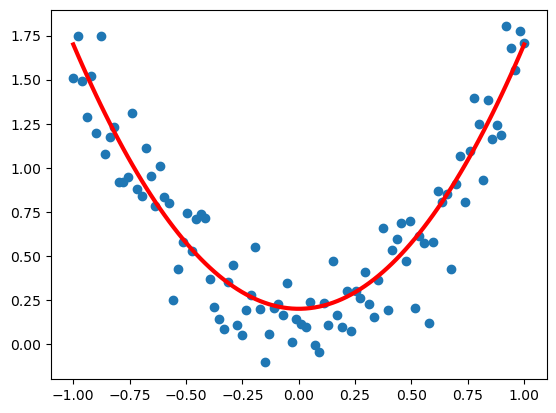

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-1, 1, 100)
y = 1.5*x*x + 0.2 + + 0.2*np.random.randn(100)
plt.scatter(x, y)
plt.plot(x, 1.5*x*x + 0.2, 'r-', lw=3)
plt.show()

In [8]:
def gradient_descent(x, y, learning_rate=0.01, iterations=1000):
    a, b, c = 0, 0, 0  # initial parameters
    n = float(len(x))  # number of points

    for i in range(iterations):
        # Predicted y values
        y_pred = a*x**2 + b*x + c

        # Derivatives
        da = (-2/n) * sum(x**2 * (y - y_pred))
        db = (-2/n) * sum(x * (y - y_pred))
        dc = (-2/n) * sum(y - y_pred)

        # Update rules
        a = a - learning_rate * da
        b = b - learning_rate * db
        c = c - learning_rate * dc

    return a, b, c

a, b, c = gradient_descent(x, y)
a, b, c

(1.2937642207170204, -0.0016972596356790712, 0.2417722275889929)

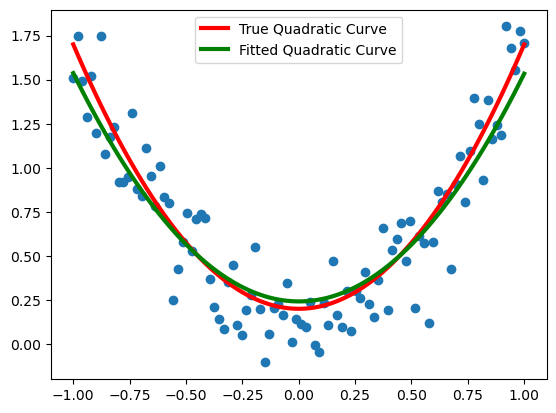

In [9]:
# plot the fitted curve, initial curve, initial data points
y_pred = a * x**2 + b * x + c
plt.scatter(x, y)
plt.plot(x, 1.5*x*x + 0.2, 'r-', lw=3, label='True Quadratic Curve')
plt.plot(x, y_pred, 'g-', lw=3, label='Fitted Quadratic Curve')
plt.legend()
plt.show()

# Lect 11

In [21]:
import torch
import torch.nn as nn
import torch.optim as op

torch.manual_seed(1) # reproducible
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1) 
y = x.pow(2) + 0.2*torch.rand(x.size())

plt.scatter(x.numpy(), y.numpy())

In [22]:
# Based on the provided code, I will define a two-layer fully connected network with biases.
# The hidden layer will have 20 outputs and sigmoid activation functions as per the original request.

class Net(nn.Module):
    # Define a two-layer network with 20 units in the hidden layer and sigmoid activation
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        # Define the first layer (input to hidden) with bias
        self.hidden = nn.Linear(n_feature, n_hidden, bias=True)
        # Define the second layer (hidden to output) with bias
        self.predict = nn.Linear(n_hidden, n_output, bias=True)
        # Sigmoid activation function
        self.activate_func = nn.Sigmoid()

    def forward(self, x):
        # Apply sigmoid activation function after the hidden layer
        x = self.activate_func(self.hidden(x))
        # Apply sigmoid activation function after the output layer
        x = self.activate_func(self.predict(x))
        return x

net = Net(n_feature=1, n_hidden=20, n_output=1) # define the network
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=20, bias=True)
  (predict): Linear(in_features=20, out_features=1, bias=True)
  (activate_func): Sigmoid()
)


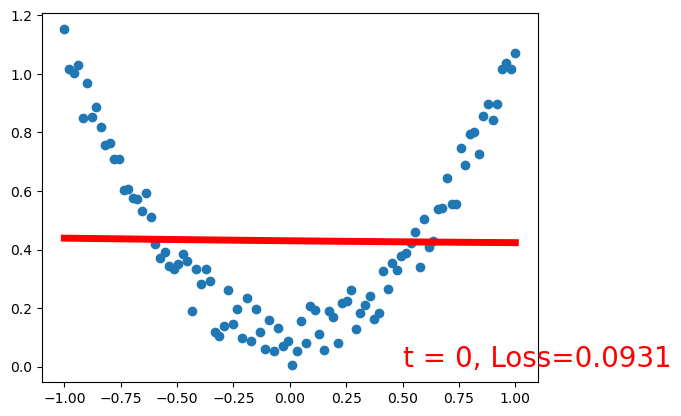

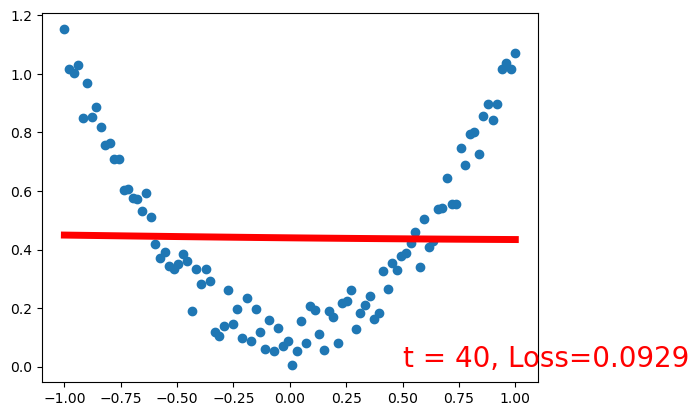

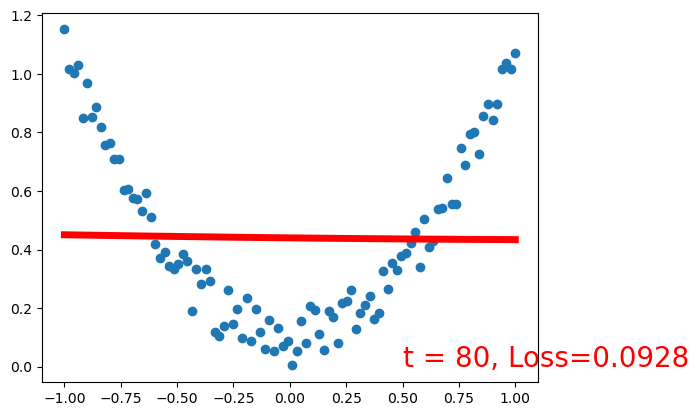

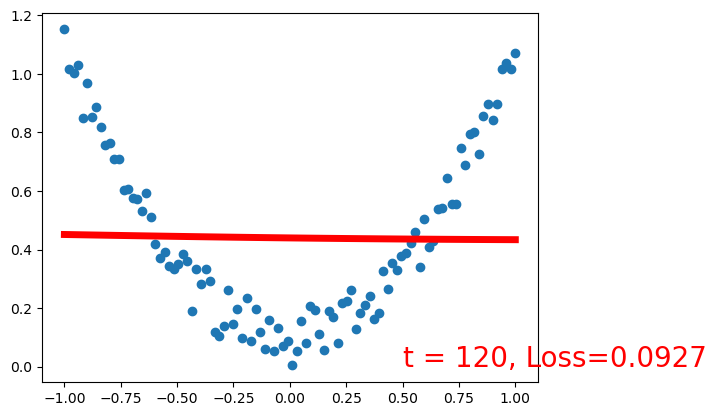

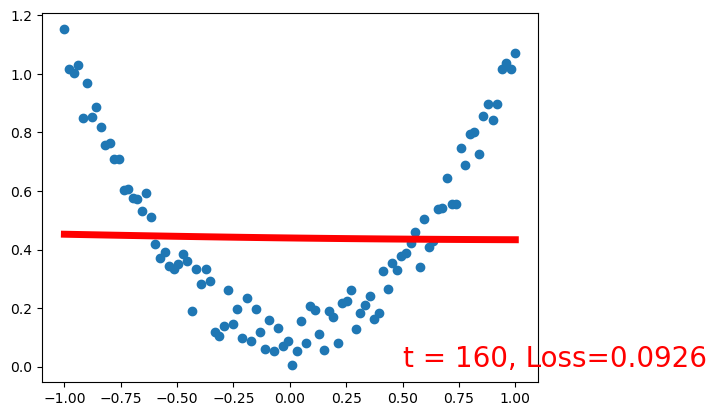

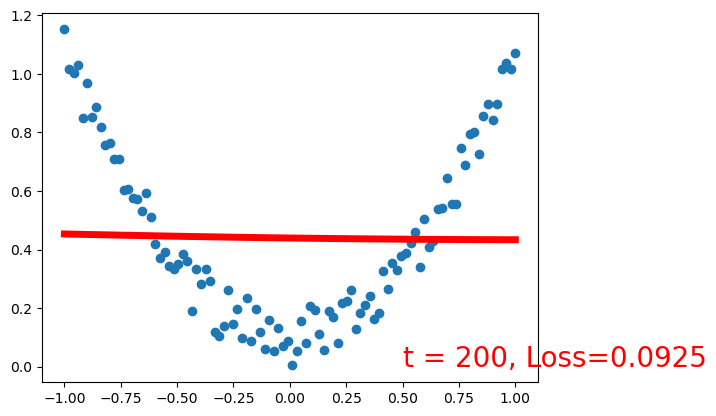

In [23]:
optimizer = op.SGD(net.parameters(), lr=0.2)
loss_func = nn.MSELoss()  # this is for regression mean squared loss

plt.ion()   # something about plotting

for t in range(0, 201):
    prediction = net(x)     # input x and predict based on x
    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 40 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.numpy(), y.numpy())
        plt.plot(x.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 't = %d, Loss=%.4f' % (t, loss.data.numpy()), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)
        plt.show()

plt.ioff()